<a href="https://colab.research.google.com/github/Lulu03damaris/Prueba_MN/blob/main/Prueba2_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

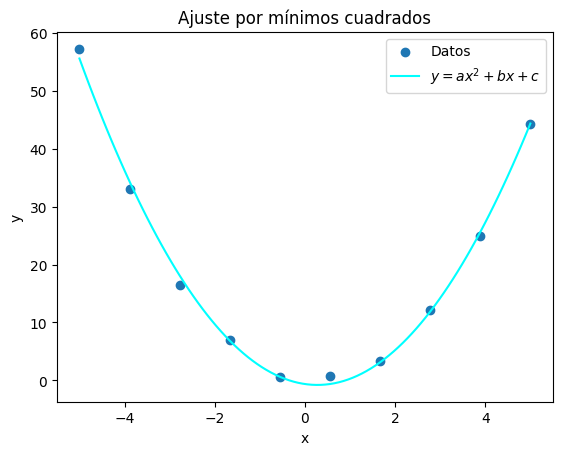

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def der_parcial_0_exp(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores `xs` y `ys`. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters

    `xs`: lista de valores de x.

    `ys`: lista de valores de y.

    ## Return

    `c_2`: coeficiente del parámetro 2.

    `c_1`: coeficiente del parámetro 1.

    `c_0`: coeficiente del parámetro 0.

    `c_ind`: coeficiente del término independiente.

    """
    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(y * x**2 for x, y in zip(xs, ys))

    return c_2, c_1, c_0, c_ind

def der_parcial_1_exp(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**3 for x in xs)
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(y * x for x, y in zip(xs, ys))

    return c_2, c_1, c_0, c_ind

def der_parcial_2_exp(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**2 for x in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)

    return c_2, c_1, c_0, c_ind

def ajustar_min_cuadrados(xs, ys, gradientes):
    A = []
    b = []
    for g in gradientes:
        coef = g(xs, ys)
        A.append(coef[:-1])
        b.append(coef[-1])
    A = np.array(A)
    b = np.array(b)
    params = np.linalg.solve(A, b)
    return params

def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

# Puntos dados
xs2 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys2 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

# Ajustar los parámetros de la cuadrática
gradientes = [der_parcial_0_exp, der_parcial_1_exp, der_parcial_2_exp]
pars = ajustar_min_cuadrados(xs2, ys2, gradientes)

# Crear la función cuadrática ajustada
x = np.linspace(-5, 5, 100)
y = [cuadratica(xi, pars) for xi in x]

# Graficar los puntos y la función cuadrática ajustada
plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="cyan", label=r"$ y = ax^2 + bx + c $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()


In [ ]:
def calc_determinante(A: list[list[float]]) -> float:
    """Función que calcula el determinante usando el método
    de eliminación gaussiana.

    ## Parameters
    ``A``: Matriz cuadrada de tamaño n x n

    ## Return
    ``detA``: Determinante de la matriz A

    """
    n = len(A)
    for i in range(n):
        # Buscar el mayor elemento en la columna i para el pivote
        max_row = i
        for k in range(i + 1, n):
            if abs(A[k][i]) > abs(A[max_row][i]):
                max_row = k
        # Intercambiar la fila i con la fila del mayor elemento encontrado
        A[i], A[max_row] = A[max_row], A[i]

        # Si el pivote es cero, el determinante es cero
        if A[i][i] == 0:
            return 0

        # Realizar la eliminación gaussiana
        for k in range(i + 1, n):
            factor = A[k][i] / A[i][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]

    # Calcular el determinante como el producto de los elementos de la diagonal principal
    detA = 1
    for i in range(n):
        detA *= A[i][i]

    return detA

# Matriz de ejemplo
A = [
    [-4, 2, -4, -4, 1, 2, 5, 3, 5, 1],
    [1, 0, 4, 3, 0, -2, 3, 0, 1, 5],
    [5, 5, -4, 5, -4, 2, 2, 2, 4, 4],
    [-1, 3, 4, -1, -4, 0, 5, 0, 0, 5],
    [4, 1, 4, 2, 0, 0, 3, -1, 0, 2],
    [2, -2, 1, -1, -2, -3, 2, -2, 4, -1],
    [3, -2, -3, -2, -1, -3, 5, -1, 5, 0],
    [3, 4, -3, 3, -2, 2, -4, -4, 1, 5],
    [-4, 0, 3, 3, -3, -2, -2, 0, 5, -4],
    [-2, 4, 4, -2, -1, 1, 5, -1, 3, -3],
]

# Calcular el determinante
detA = calc_determinante(A)
print(f"El determinante de la matriz A es:{detA:.9g}")


El determinante de la matriz A es:9912776


In [ ]:
def calc_determinante1(A: list[list[float]]) -> float:
    """Función que calcula el determinante usando el método
    de eliminación gaussiana.

    ## Parameters
    ``A``: Matriz cuadrada de tamaño n x n

    ## Return
    ``detA``: Determinante de la matriz A

    """
    n = len(A)
    for i in range(n):
        # Buscar el mayor elemento en la columna i para el pivote
        max_row = i
        for k in range(i + 1, n):
            if abs(A[k][i]) > abs(A[max_row][i]):
                max_row = k
        # Intercambiar la fila i con la fila del mayor elemento encontrado
        A[i], A[max_row] = A[max_row], A[i]

        # Si el pivote es cero, el determinante es cero
        if A[i][i] == 0:
            return 0

        # Realizar la eliminación gaussiana
        for k in range(i + 1, n):
            factor = A[k][i] / A[i][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]

    # Calcular el determinante como el producto de los elementos de la diagonal principal
    detA = 1
    for i in range(n):
        detA *= A[i][i]

    return detA

# Matriz de ejemplo
A = [
    [2, 2, 4, 5, -2, -3, 2, -2],
    [-1, -1, 3, 2, 1, 1, -4, 4],
    [2, 5, -3, -3, -2, 2, 5, 3],
    [-2, -4, 0, 1, -1, 5, -4, -1],
    [1, -2, -1, 5, 5, 2, 1, -2],
    [5, 4, 0, 3, 4, -1, -3, -2],
    [4, -4, 1, 2, 3, 3, -1, 3],
    [-2, 1, -3, 0, 5, 4, 4, -4],
]

# Calcular el determinante
detA = calc_determinante1(A)
print(f"El determinante de la matriz A es:{detA:.9g}")

El determinante de la matriz A es:2341546
